In [2]:
import pandas as pd
import numpy as np
import tsplib95
from tqdm import trange
import copy

from map import Map
from anneal import SimAnneal
# from main import get_data, create_map

import matplotlib.pyplot as plt
%matplotlib inline
from time import strftime, localtime

In [3]:
SA = SimAnneal(type="eil51",
               T0=20,
               sched=1,
               chain_length=200,
               method=4)

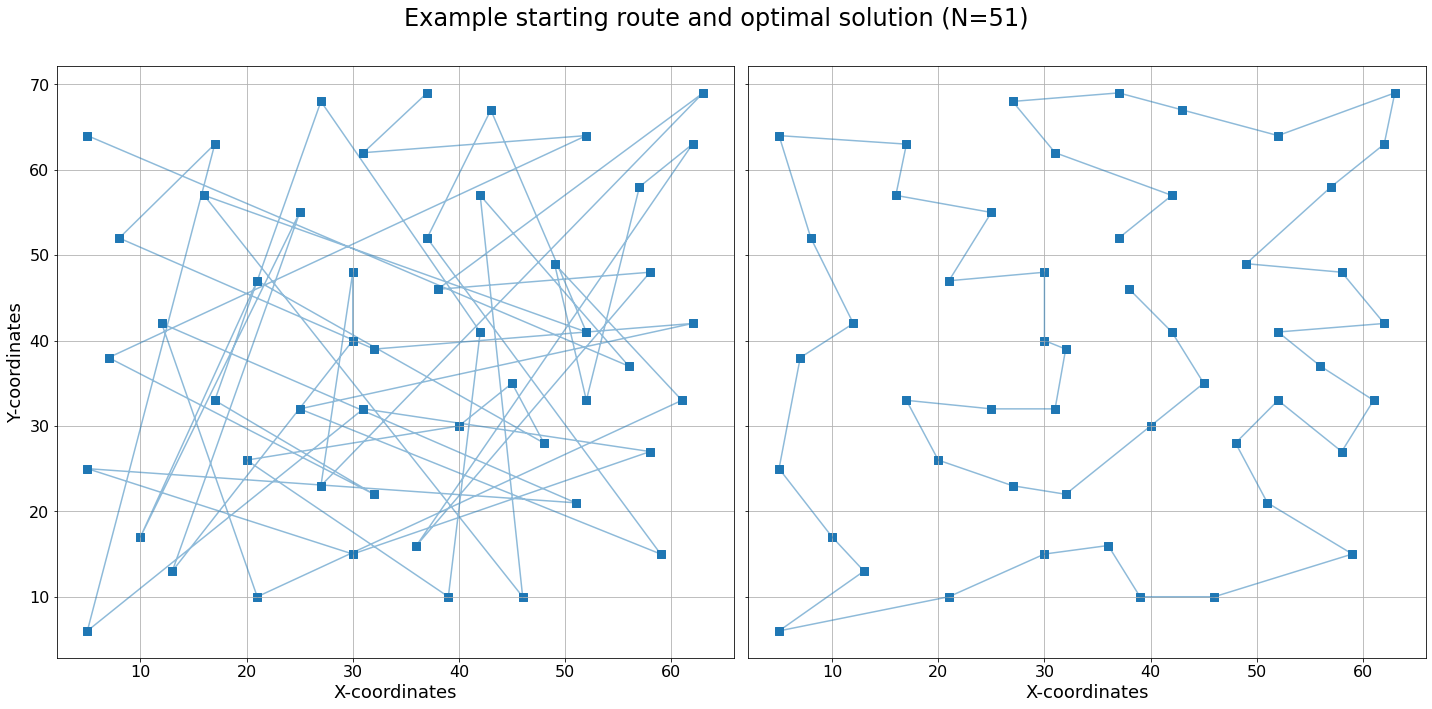

In [48]:
fig, axis = plt.subplots(1, 2, figsize=(20,10), sharex=True, sharey=True)

axis[0].scatter(np.asarray(list(SA.Map.coords.values()))[:, 0], 
             np.asarray(list(SA.Map.coords.values()))[:, 1], marker='s', s=50)
axis[0].grid()
axis[0].set_ylabel("Y-coordinates", fontsize=18)
axis[0].set_xlabel("X-coordinates", fontsize=18)
x = []
y = []
for edge in SA.Map.edges:
    x.append(SA.Map.coords[edge[0]][0])
    y.append(SA.Map.coords[edge[0]][1])
axis[0].plot(x, y, alpha=0.5)
h, l = axis[0].get_legend_handles_labels()

axis[1].scatter(np.asarray(list(SA.Map.coords.values()))[:, 0], 
             np.asarray(list(SA.Map.coords.values()))[:, 1], marker='s', s=50)
axis[1].grid()
axis[1].set_xlabel("X-coordinates", fontsize=18)
x = []
y = []
for edge in SA.Map.make_edges_of_tour(SA.Map.optimal_tour):
    x.append(SA.Map.coords[edge[0]][0])
    y.append(SA.Map.coords[edge[0]][1])
axis[1].plot(x, y, alpha=0.5)

# fig.set_xlabel("X-coordinates", fontsize=18)
for ax in axis:
    ax.tick_params(labelsize=16)
fig.suptitle('Example starting route and optimal solution (N=51)\n', fontsize=24)
# plt.xlabel("X-coordinates", fontsize=18)
fig.tight_layout()

# x = []
# y = []

# plt.show()
# print('Tour length: ', self.calculate_tour_length(self.edges))
# return 'No Error'

In [84]:
df = pd.DataFrame([np.random.random(size=90), 
                   [np.random.choice(['a', 'b']) for i in range(90)], 
                   [np.random.choice(['a10', 'a20', 'a30', 'a40', 'a50']) for i in range(90)]]).T
df.columns = ['Distance', 'Schedule', 'T0']
df

,Distance,Schedule,T0
0,0.559926,b,a20
1,0.024973,b,a10
2,0.264339,b,a10
3,0.587992,b,a40
4,0.024396,a,a50
...,...,...,...
85,0.534141,b,a50
86,0.360894,a,a30
87,0.227285,a,a10
88,0.730172,b,a40


In [72]:
import seaborn as sns

In [122]:
def coolsched1(T0, iteration, params=0.0005):
    """
    Caluclates temperature according to a cooling schedule

    Returns
        T   (float)             Temperature
    """
    if iteration == 0:
        T = T0
    else:
        T = T0 * np.exp(-iteration * params)

    return T

def coolsched2(T0, iteration, params=1):
    """
    Caluclates temperature according to a cooling schedule

    Returns
        T   (float)             Temperature
    """

    if iteration == 0:
        T = T0
    else:
        T = T0/(np.log(iteration + params))

    return T

No handles with labels found to put in legend.


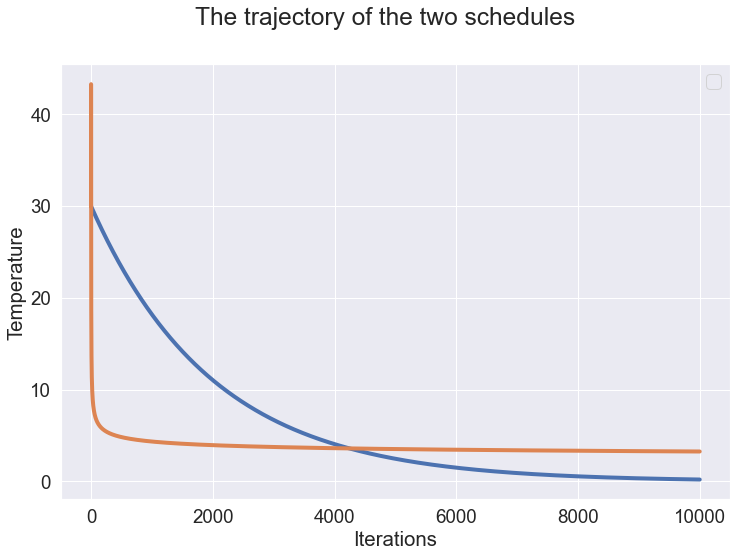

In [159]:
# x = np.linspace(30, 0, 1000)[:-1]
y1 = [coolsched1(30, i) for i in range(10000)]
y2 = [coolsched2(30, i) for i in range(10000)]

fig, axis = plt.subplots(figsize=(12, 8))
fig.suptitle('The trajectory of the two schedules')

# x = np.linspace(0, 10000, 11)
# y11 = [coolsched1(30, i) for i in x]
# y22 = [coolsched2(30, i) for i in x]

axis.plot(list(range(10000)), y1, linewidth=4)
axis.plot(list(range(10000)), y2, linewidth=4)
# a = axis.scatter(x, y11, label='Exponential', s=100)
# b = axis.scatter(x, y22, label='Logarithm', s=100)
axis.set_xlabel('Iterations')
axis.set_ylabel('Temperature')

plt.legend()

In [248]:
print(os.listdir('results'))
df1 = pd.read_csv('results/21_12_22_13_44_56_T0s_sched1.csv')
df2 = pd.read_csv('results/21_12_22_13_46_13_T0_sched2s.csv')
df3 = pd.read_csv('results/21_12_22_19_56_03_T0s_sched1.csv')
df4 = pd.read_csv('results/21_12_22_18_57_22_T0s_sched2.csv')

['21_12_22_08_32_39_T0s.csv', '21_12_22_13_44_56_T0s_sched1.csv', '21_12_22_13_46_13_T0_sched2s.csv', '21_12_22_16_26_42_Methods.csv', '21_12_22_18_57_22_T0s_sched2.csv', '21_12_22_19_56_03_T0s_sched1.csv', '21_12_22_21_06_14_Chains.csv', '21_12_22_21_07_31_Chains.csv', 'all_data_sched1.csv', 'all_data_sched2.csv', 'data_1639942391.765341', 'data_1639942431.197261', 'data_1639942459.025821', 'data_many_21_12_21_22_01_43']


In [249]:
del new
del df
new = {
    'Distance':[],
    'Schedule':[],
    'T0':[]
}
for column in df1.columns.to_list():
    for value in df1[column]:
        new['Distance'].append(value)
        new['Schedule'].append('Exponential')
        new['T0'].append(column)
for column in df2.columns.to_list():
    for value in df2[column]:
        new['Distance'].append(value)
        new['Schedule'].append('Logarithmic')
        new['T0'].append(column)
for column in df3.columns.to_list():
    for value in df3[column]:
        new['Distance'].append(value)
        new['Schedule'].append('Exponential')
        new['T0'].append(column)
for column in df4.columns.to_list():
    for value in df4[column]:
        new['Distance'].append(value)
        new['Schedule'].append('Logarithmic')
        new['T0'].append(column)
df = pd.DataFrame(new)

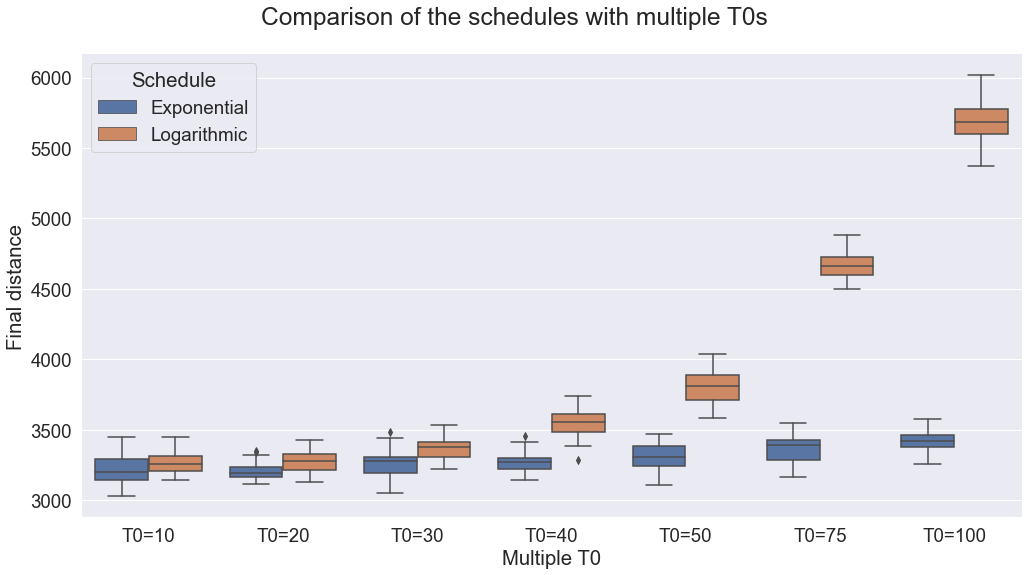

In [250]:
sns.set(font_scale=1.7)
figure = sns.catplot(data=df, x="T0", y="Distance", hue="Schedule", 
                     kind='box', height=8.27, aspect=14.7/8.27, margin_titles=True, legend_out=False)
figure.fig.suptitle('Comparison of the schedules with multiple T0s\n\n')
figure.ax.set_xlabel('Multiple T0')
figure.ax.set_ylabel('Final distance')
figure.fig.subplots_adjust(top=0.9)

In [251]:
import scipy.stats as st 

for i in df['Schedule'].unique():
    for j in df['T0'].unique():
        a = df.loc[(df['Schedule'] == i) & (df['T0'] == j)]['Distance']
        print(i, j)
        print(round(np.mean(a), 2))
        print(round(np.std(a), 2))
        c, d = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
        print(round(c, 2), round(d, 2), '\n')




Exponential T0=10
3220.07
101.81
3181.4 3258.73 

Exponential T0=20
3209.3
64.08
3184.96 3233.64 

Exponential T0=30
3262.2
94.61
3226.27 3298.13 

Exponential T0=40
3272.1
68.95
3245.91 3298.29 

Exponential T0=50
3314.73
96.2
3278.2 3351.27 

Exponential T0=75
3365.3
92.68
3330.1 3400.5 

Exponential T0=100
3422.43
70.05
3395.83 3449.04 

Logarithmic T0=10
3269.07
80.25
3238.59 3299.54 

Logarithmic T0=20
3272.3
81.76
3241.25 3303.35 

Logarithmic T0=30
3361.8
72.38
3334.31 3389.29 

Logarithmic T0=40
3548.13
102.12
3509.35 3586.92 

Logarithmic T0=50
3806.97
112.5
3764.24 3849.69 

Logarithmic T0=75
4669.6
97.7
4632.5 4706.7 

Logarithmic T0=100
5692.23
135.75
5640.68 5743.79 



In [221]:
df = pd.read_csv('results/21_12_22_16_26_42_Methods.csv')
df.columns = ['Swap 1 node', 'Swap 2 nodes', 'Swap N \nsequential nodes', 'Combined']
new = {
    'Distance':[],
    'Method':[],
}
for column in df.columns.to_list():
    for value in df[column]:
        new['Distance'].append(value)
        new['Method'].append(column)
df = pd.DataFrame(new)
df

,Distance,Method
0,3298.0,Swap 1 node
1,3425.0,Swap 1 node
2,3235.0,Swap 1 node
3,3336.0,Swap 1 node
4,3332.0,Swap 1 node
...,...,...
115,3120.0,Combined
116,3301.0,Combined
117,3187.0,Combined
118,3228.0,Combined


Text(0, 0.5, 'Final distance')

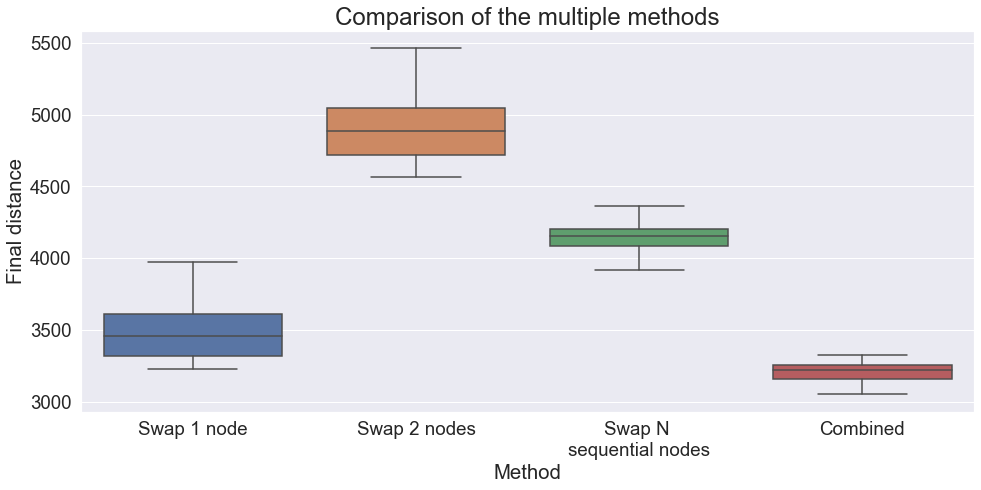

In [227]:
plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x='Method', y='Distance', orient='v')
plt.title('Comparison of the multiple methods', fontsize=24)
plt.ylabel('Final distance')

In [213]:
for i in df['Method'].unique():
    a = df.loc[(df['Method'] == i)]['Distance']
    print(i)
    print(round(np.mean(a), 2))
    print(round(np.std(a), 2))
    c, d = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
    print(round(c, 2), round(d, 2), '\n')

Method=1
3475.4
176.89
3408.22 3542.58 

Method=2
4904.3
217.23
4821.8 4986.8 

Method=3
4145.87
98.19
4108.58 4183.16 

Method=4
3210.83
71.28
3183.76 3237.9 



In [231]:
df1 = pd.read_csv('results/21_12_22_21_06_14_Chains.csv')
df2 = pd.read_csv('results/21_12_22_21_07_31_Chains.csv')
new = {
    'Distance':[],
    'Markov Chain length':[],
}
for column in df1.columns.to_list():
    for value in df1[column]:
        new['Distance'].append(value)
        new['Markov Chain length'].append(column)
for column in df2.columns.to_list():
    for value in df2[column]:
        new['Distance'].append(value)
        new['Markov Chain length'].append(column)
df = pd.DataFrame(new)
df

,Distance,Markov Chain length
0,9729.0,Chainlength=1
1,8737.0,Chainlength=1
2,9308.0,Chainlength=1
3,9143.0,Chainlength=1
4,9058.0,Chainlength=1
...,...,...
205,2685.0,Chainlength=500
206,2733.0,Chainlength=500
207,2876.0,Chainlength=500
208,2844.0,Chainlength=500


Text(0, 0.5, 'Final distance')

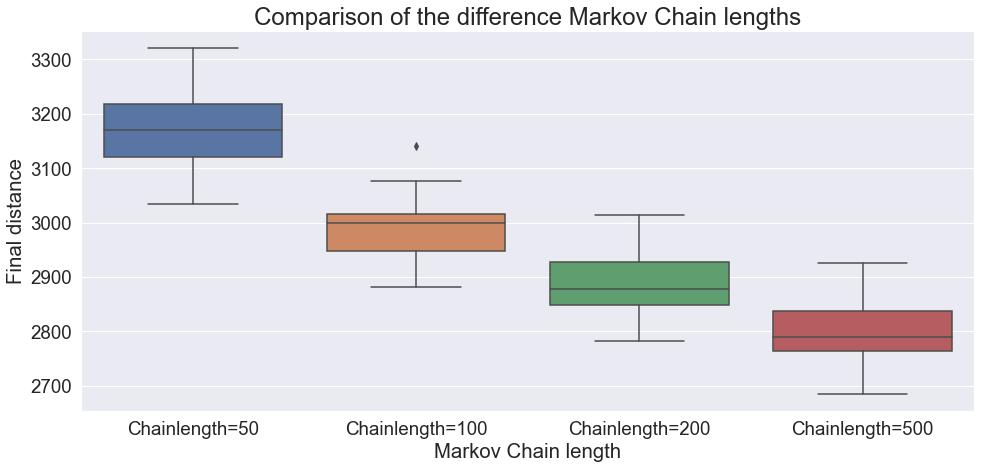

In [234]:
nn = df.loc[df['Markov Chain length'] != 'Chainlength=1']
plt.figure(figsize=(16, 7))
sns.boxplot(data=nn, x='Markov Chain length', y='Distance', orient='v')
plt.title('Comparison of the difference Markov Chain lengths', fontsize=24)
plt.ylabel('Final distance')

In [236]:
for i in df['Markov Chain length'].unique():
    a = df.loc[(df['Markov Chain length'] == i)]['Distance']
    print(i)
    print(round(np.mean(a), 2))
    print(round(np.std(a), 2))
    c, d = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
    print(round(c, 2), round(d, 2), '\n')

Chainlength=1
9197.6
351.81
9086.63 9308.56 

Chainlength=50
3176.07
76.03
3152.09 3200.05 

Chainlength=100
2989.05
56.29
2971.29 3006.8 

Chainlength=200
2884.4
53.9
2867.4 2901.4 

Chainlength=500
2796.52
48.04
2781.37 2811.67 

